# step1: Data importing

In [926]:
# importing pandas for dataframe manipulations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [908]:
# reading the train and test datssets to the dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [909]:
print(train.head()) # print top5 values of the dataset 
print("number of rows=",train.size) # gives number of rows(records)
print("gives number of columns in dataframe=",train.shape[1]) # gives number of rows and columns in a dataframe 

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  
number of rows= 10000
gives number of columns in dataframe= 10


In [910]:
print(test.head())
print("number of rows=",test.size)
print("given number of columns in dataframe=",test.shape[1])

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  
number of rows= 9000
given number of columns in dataframe= 9


In [914]:
train.nunique() #finding unique values in each column

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [916]:
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# step2: Exploratory data analysis

In [917]:
# finding to see if there are any correlation between two variables
print(train.corr())

                    Age       Job  Credit amount  Duration
Age            1.000000  0.015673       0.032716 -0.036136
Job            0.015673  1.000000       0.285385  0.210910
Credit amount  0.032716  0.285385       1.000000  0.624984
Duration      -0.036136  0.210910       0.624984  1.000000


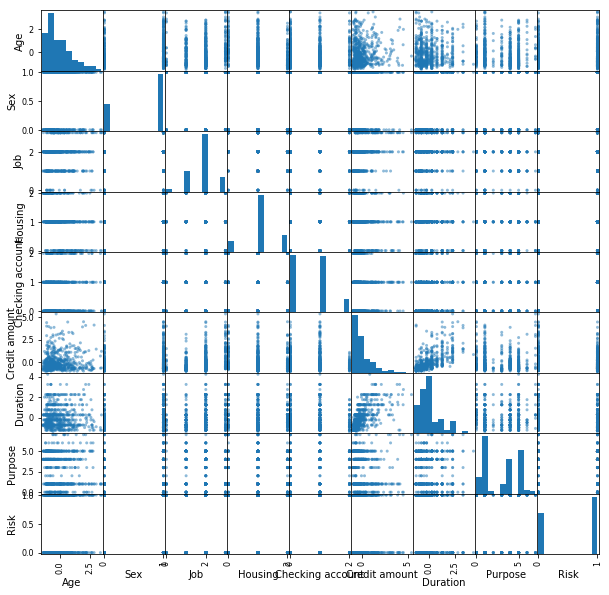

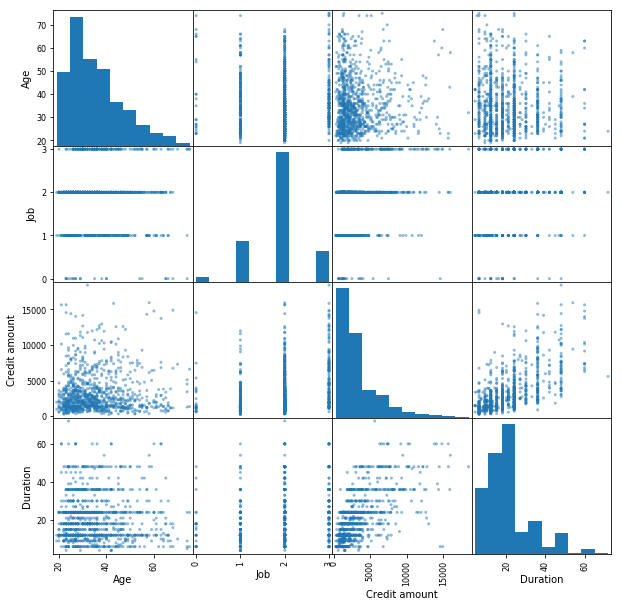

In [921]:
pd.plotting.scatter_matrix(train, figsize=(10, 10))
plt.show()

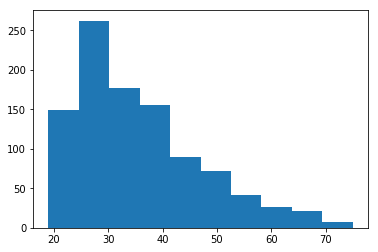

In [924]:
# label1 (continuous variable)
plt.hist(train['Age'])
plt.show()

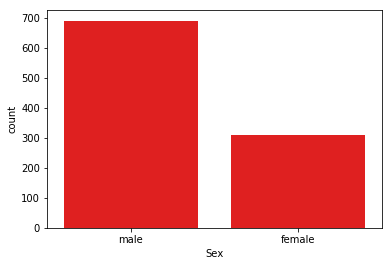

Risk,bad,good
Sex,,
female,109,201
male,191,499


In [929]:
# label2 (categorical variable)
sns.countplot(train['Sex'],color='red')
plt.show()
pd.crosstab(index=train["Sex"],columns=train["Risk"])

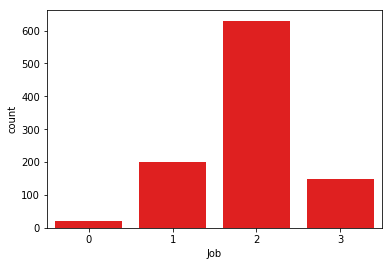

Risk,bad,good
Job,,
0,7,15
1,56,144
2,186,444
3,51,97


In [930]:
# label3 (categorical variable)
sns.countplot(train['Job'],color='red')
plt.show()
pd.crosstab(index=train["Job"],columns=train["Risk"])

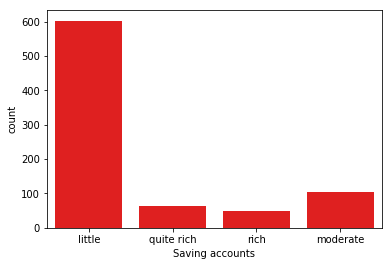

Risk,bad,good
Saving accounts,,
little,217,386
moderate,34,69
quite rich,11,52
rich,6,42


In [931]:
# label5 (categorical variable)
sns.countplot(train['Saving accounts'],color='red')
plt.show()
pd.crosstab(index=train["Saving accounts"],columns=train["Risk"])

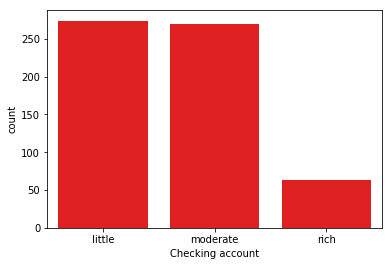

Risk,bad,good
Checking account,,
little,135,139
moderate,105,164
rich,14,49


In [932]:
# label6 (categorical variable)
sns.countplot(train['Checking account'],color='red')
plt.show()
pd.crosstab(index=train["Checking account"],columns=train["Risk"])

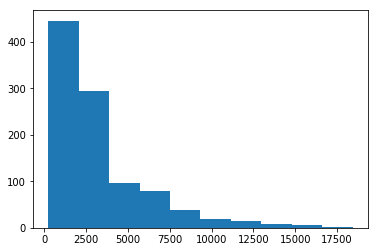

In [933]:
# label7 (continuos variable)
plt.hist(train['Credit amount'])
plt.show()

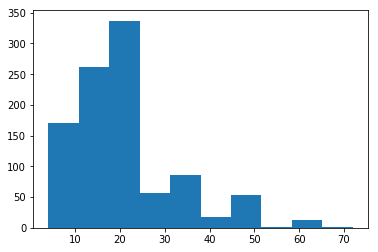

In [934]:
# label8 (continuous variable)
plt.hist(train['Duration'])
plt.show()

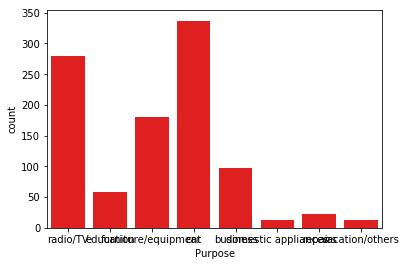

Risk,bad,good
Purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


In [935]:
# label9 (categorical variable)
sns.countplot(train['Purpose'],color='red')
plt.show()
pd.crosstab(index=train["Purpose"],columns=train["Risk"])

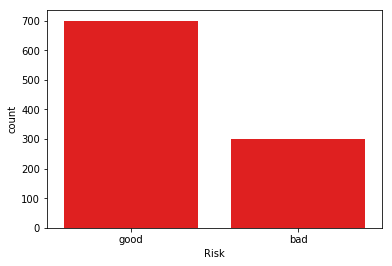

good    700
bad     300
Name: Risk, dtype: int64

In [936]:
sns.countplot(train['Risk'],color='red')
plt.show()
# or
train['Risk'].value_counts()

# step3: Data preprocessing

In [805]:
# importing standard scalar to standardize the columns to get the values into same range
from sklearn.preprocessing import StandardScaler

In [806]:
sc = StandardScaler()
# train['Duration'] = sc.fit_transform(train['Duration'])
train[['Age', 'Credit amount','Duration']] = sc.fit_transform(train[['Age','Credit amount','Duration']])

In [807]:
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,male,2,own,NaN,little,-0.745131,-1.236478,radio/TV,good
1,-1.191404,female,2,own,little,moderate,0.949817,2.248194,radio/TV,bad
2,1.183312,male,1,own,little,NaN,-0.416562,-0.738668,education,good
3,0.831502,male,2,free,little,little,1.634247,1.750384,furniture/equipment,good
4,1.535122,male,2,free,little,little,0.566664,0.256953,car,bad


In [808]:
train.columns[train.isnull().any()].tolist()

['Saving accounts', 'Checking account']

In [809]:
train.isnull().sum(axis=0)
# counting number of missing values in the column that has NA's. We can remove the columns that has more than certain (threshold)
#NA's as it does not effectively contribute to our problem 

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [810]:
test.isnull().sum(axis=0)
# counting number of missing values in the column that has NA's. We can remove the columns that has more than certain (threshold)
#NA's as it does not effectively contribute to our problem 

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [811]:
# Observation: Using Knn method for Removing NA values instead of fillng with single value like mean or mode as there are higher percentange of NA values. 

In [812]:
train1 = train.drop('Saving accounts',axis=1)

In [813]:
train1.columns[train1.isnull().any()].tolist()

['Checking account']

In [814]:
train1.head()

,Age,Sex,Job,Housing,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,male,2,own,little,-0.745131,-1.236478,radio/TV,good
1,-1.191404,female,2,own,moderate,0.949817,2.248194,radio/TV,bad
2,1.183312,male,1,own,NaN,-0.416562,-0.738668,education,good
3,0.831502,male,2,free,little,1.634247,1.750384,furniture/equipment,good
4,1.535122,male,2,free,little,0.566664,0.256953,car,bad


In [815]:
train1['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [816]:
train_checking = train1[train1['Checking account'].notnull()]
print(train_checking.shape)
train_checking.head()

(606, 9)


,Age,Sex,Job,Housing,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,male,2,own,little,-0.745131,-1.236478,radio/TV,good
1,-1.191404,female,2,own,moderate,0.949817,2.248194,radio/TV,bad
3,0.831502,male,2,free,little,1.634247,1.750384,furniture/equipment,good
4,1.535122,male,2,free,little,0.566664,0.256953,car,bad
7,-0.048022,male,3,rent,moderate,1.303197,1.252574,car,good


In [817]:
test_checking = train1[train1['Checking account'].isnull()]
print(test_checking.shape)
test_checking.head()

(394, 9)


,Age,Sex,Job,Housing,Checking account,Credit amount,Duration,Purpose,Risk
2,1.183312,male,1,own,NaN,-0.416562,-0.738668,education,good
5,-0.048022,male,1,free,NaN,2.050009,1.252574,education,good
6,1.535122,male,2,own,NaN,-0.154629,0.256953,furniture/equipment,good
8,2.238742,male,1,own,NaN,-0.075233,-0.738668,radio/TV,good
16,1.535122,male,2,own,NaN,-0.300305,0.256953,radio/TV,good


In [818]:
test_checking = test_checking.drop('Checking account',axis=1)

In [819]:
# label encoding the categorical data
# from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
            

In [820]:
train_new = MultiColumnLabelEncoder(columns = ['Sex','Housing','Checking account','Purpose','Risk']).fit_transform(train_checking)
print(train_new.shape)
# train_new.head()

(606, 9)


In [918]:
# after label encoding
# good - 1
# bad - 0

In [821]:
y_train_checking = train_new['Checking account']
y_train_checking.head()

0    0
1    1
3    0
4    0
7    1
Name: Checking account, dtype: int64

In [822]:
x_train_checking = train_new.drop('Checking account',axis=1)
x_train_checking.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,2.766456,1,2,1,-0.745131,-1.236478,5,1
1,-1.191404,0,2,1,0.949817,2.248194,5,0
3,0.831502,1,2,0,1.634247,1.750384,4,1
4,1.535122,1,2,0,0.566664,0.256953,1,0
7,-0.048022,1,3,2,1.303197,1.252574,1,1


In [823]:
test_new = MultiColumnLabelEncoder(columns = ['Sex','Housing','Purpose','Risk']).fit_transform(test_checking)
print(test_new.shape)
test_new.head()

(394, 8)


,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
2,1.183312,1,1,1,-0.416562,-0.738668,3,1
5,-0.048022,1,1,0,2.050009,1.252574,3,1
6,1.535122,1,2,1,-0.154629,0.256953,4,1
8,2.238742,1,1,1,-0.075233,-0.738668,5,1
16,1.535122,1,2,1,-0.300305,0.256953,5,1


In [824]:
x_test_checking = test_new
x_test_checking.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
2,1.183312,1,1,1,-0.416562,-0.738668,3,1
5,-0.048022,1,1,0,2.050009,1.252574,3,1
6,1.535122,1,2,1,-0.154629,0.256953,4,1
8,2.238742,1,1,1,-0.075233,-0.738668,5,1
16,1.535122,1,2,1,-0.300305,0.256953,5,1


In [825]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train_checking, y_train_checking)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [826]:
y_test_checking = classifier.predict(x_test_checking)

In [827]:
y_test_checking[1:10]

array([0, 0, 0, 0, 2, 0, 0, 1, 1], dtype=int64)

In [828]:
x_test_checking['Checking account'] = y_test_checking
x_test_checking.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Checking account
2,1.183312,1,1,1,-0.416562,-0.738668,3,1,0
5,-0.048022,1,1,0,2.050009,1.252574,3,1,0
6,1.535122,1,2,1,-0.154629,0.256953,4,1,0
8,2.238742,1,1,1,-0.075233,-0.738668,5,1,0
16,1.535122,1,2,1,-0.300305,0.256953,5,1,0


In [829]:
x_test_checking['Checking account'].value_counts()

0    218
1    155
2     21
Name: Checking account, dtype: int64

In [830]:
x_train_checking['Checking account'] = y_train_checking

In [831]:
print(x_train_checking.head())
x_train_checking.shape

        Age  Sex  Job  Housing  Credit amount  Duration  Purpose  Risk  \
0  2.766456    1    2        1      -0.745131 -1.236478        5     1   
1 -1.191404    0    2        1       0.949817  2.248194        5     0   
3  0.831502    1    2        0       1.634247  1.750384        4     1   
4  1.535122    1    2        0       0.566664  0.256953        1     0   
7 -0.048022    1    3        2       1.303197  1.252574        1     1   

   Checking account  
0                 0  
1                 1  
3                 0  
4                 0  
7                 1  


(606, 9)

In [832]:
frames = [x_train_checking,x_test_checking]
train2 = pd.concat(frames)

In [833]:
train2['Saving accounts'] = train['Saving accounts']

In [834]:
print(train2.head())
print(train2.shape)

        Age  Sex  Job  Housing  Credit amount  Duration  Purpose  Risk  \
0  2.766456    1    2        1      -0.745131 -1.236478        5     1   
1 -1.191404    0    2        1       0.949817  2.248194        5     0   
3  0.831502    1    2        0       1.634247  1.750384        4     1   
4  1.535122    1    2        0       0.566664  0.256953        1     0   
7 -0.048022    1    3        2       1.303197  1.252574        1     1   

   Checking account Saving accounts  
0                 0             NaN  
1                 1          little  
3                 0          little  
4                 0          little  
7                 1          little  
(1000, 10)


In [835]:
train2.columns[train2.isnull().any()].tolist()

['Saving accounts']

In [836]:
train2['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [837]:
train_saving = train2[train2['Saving accounts'].notnull()]
print(train_saving.shape)
train_saving.head()

(817, 10)


,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Checking account,Saving accounts
1,-1.191404,0,2,1,0.949817,2.248194,5,0,1,little
3,0.831502,1,2,0,1.634247,1.750384,4,1,0,little
4,1.535122,1,2,0,0.566664,0.256953,1,0,0,little
7,-0.048022,1,3,2,1.303197,1.252574,1,1,1,little
9,-0.663689,1,3,1,0.695681,0.754763,1,0,1,little


In [838]:
train_last = MultiColumnLabelEncoder(columns = ['Saving accounts']).fit_transform(train_saving)
print(train_last.shape)
train_last.head()

(817, 10)


,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Checking account,Saving accounts
1,-1.191404,0,2,1,0.949817,2.248194,5,0,1,0
3,0.831502,1,2,0,1.634247,1.750384,4,1,0,0
4,1.535122,1,2,0,0.566664,0.256953,1,0,0,0
7,-0.048022,1,3,2,1.303197,1.252574,1,1,1,0
9,-0.663689,1,3,1,0.695681,0.754763,1,0,1,0


In [839]:
y_train_saving = train_last['Saving accounts']
# print(y_train_saving.head())
y_train_saving.value_counts()

0    603
1    103
2     63
3     48
Name: Saving accounts, dtype: int64

In [840]:
x_train_saving = train_last.drop('Saving accounts',axis=1)
# x_train_saving.head()

In [841]:
test_saving = train2[train2['Saving accounts'].isnull()]
print(test_saving.shape)
test_saving.head()

(183, 10)


,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Checking account,Saving accounts
0,2.766456,1,2,1,-0.745131,-1.236478,5,1,0,NaN
17,-0.927547,1,2,1,1.701591,0.754763,0,1,0,NaN
50,-0.575737,1,1,1,-0.332559,0.256953,4,1,1,NaN
56,1.447170,1,3,1,1.133064,-0.738668,5,0,1,NaN
61,1.271265,1,2,1,-0.614696,-0.489762,5,1,1,NaN


In [842]:
test_last = test_saving
# print(test_last.shape)
# test_last.head()

In [843]:
x_test_saving = test_last.drop('Saving accounts',axis=1)
x_test_saving.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Checking account
0,2.766456,1,2,1,-0.745131,-1.236478,5,1,0
17,-0.927547,1,2,1,1.701591,0.754763,0,1,0
50,-0.575737,1,1,1,-0.332559,0.256953,4,1,1
56,1.447170,1,3,1,1.133064,-0.738668,5,0,1
61,1.271265,1,2,1,-0.614696,-0.489762,5,1,1


In [844]:
classifier1 = KNeighborsClassifier(n_neighbors=3)  
classifier1.fit(x_train_saving, y_train_saving)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [845]:
y_test_saving = classifier1.predict(x_test_saving)

In [846]:
x_test_saving['Saving accounts'] = y_test_saving
# x_test_saving.head()

In [847]:
x_test_saving['Saving accounts'].value_counts()

0    160
1     15
2      5
3      3
Name: Saving accounts, dtype: int64

In [848]:
x_train_saving['Saving accounts'] = y_train_saving

In [849]:
x_train_saving.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Checking account,Saving accounts
1,-1.191404,0,2,1,0.949817,2.248194,5,0,1,0
3,0.831502,1,2,0,1.634247,1.750384,4,1,0,0
4,1.535122,1,2,0,0.566664,0.256953,1,0,0,0
7,-0.048022,1,3,2,1.303197,1.252574,1,1,1,0
9,-0.663689,1,3,1,0.695681,0.754763,1,0,1,0


In [850]:
frames1 = [x_train_saving,x_test_saving]
train3 = pd.concat(frames1)

In [851]:
train3['Saving accounts'].value_counts()

0    763
1    118
2     68
3     51
Name: Saving accounts, dtype: int64

In [852]:
y = train3['Risk']

In [853]:
X = train3.drop('Risk',axis=1)

In [854]:
X.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Checking account,Saving accounts
1,-1.191404,0,2,1,0.949817,2.248194,5,1,0
3,0.831502,1,2,0,1.634247,1.750384,4,0,0
4,1.535122,1,2,0,0.566664,0.256953,1,0,0
7,-0.048022,1,3,2,1.303197,1.252574,1,1,0
9,-0.663689,1,3,1,0.695681,0.754763,1,1,0


# step4: Applying model and tuning parameters

In [855]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [856]:
# importing the model to perform analysis and metrics for evaluating the correctness of the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [895]:
rf = RandomForestClassifier(n_estimators=25, max_depth=15, n_jobs=-1)

# fitting the model on the dataset
start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

In [896]:
# predicting on the model on training set

start = time.time()
y_pred_train = rf_model.predict(X_train)
end = time.time()
pred_train_time = (end - start)

precision, recall, fscore, train_support = score(y_train, y_pred_train, pos_label=1, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Fscore: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_train_time, 3), round(precision, 3), round(recall, 3), round(fscore, 3), round((y_pred_train==y_train).sum()/len(y_pred_train), 3)))

Fit time: 0.428 / Predict time: 0.109 ---- Precision: 0.979 / Recall: 0.998 / Fscore: 0.988 / Accuracy: 0.984


In [897]:
# predicting on the model on the test set

start = time.time()
y_pred_test = rf_model.predict(X_test)
end = time.time()
pred_test_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred_test, pos_label=1, average='binary')
print('Predict time: {} ---- Precision: {} / Recall: {} / Fscore: {} / Accuracy: {} '.format(
     round(pred_test_time, 3), round(precision, 3), round(recall, 3), round(fscore, 3), round((y_pred_test==y_test).sum()/len(y_pred_test), 3)))

Predict time: 0.109 ---- Precision: 0.761 / Recall: 0.867 / Fscore: 0.81 / Accuracy: 0.71 


In [903]:
classifier3 = KNeighborsClassifier(n_neighbors=3)  
classifier3.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [904]:
# predicting on the model on training set

start = time.time()
y_pred_train = classifier3.predict(X_train)
end = time.time()
pred_train_time = (end - start)

precision, recall, fscore, train_support = score(y_train, y_pred_train, pos_label=1, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Fscore: {} / Accuracy: {} '.format(
    round(fit_time, 3), round(pred_train_time, 3), round(precision, 3), round(recall, 3),round(fscore, 3), round((y_pred_train==y_train).sum()/len(y_pred_train), 3)))

Fit time: 0.428 / Predict time: 0.01 ---- Precision: 0.849 / Recall: 0.948 / Fscore: 0.896 / Accuracy: 0.846 


In [905]:
# predicting on the model on the test set

start = time.time()
y_pred_test = classifier3.predict(X_test)
end = time.time()
pred_test_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred_test, pos_label=1, average='binary')
print('Predict time: {} ---- Precision: {} / Recall: {} / Fscore: {} / Accuracy: {} '.format(
     round(pred_test_time, 3), round(precision, 3), round(recall, 3), round(fscore, 3), round((y_pred_test==y_test).sum()/len(y_pred_test), 3)))

Predict time: 0.004 ---- Precision: 0.737 / Recall: 0.86 / Fscore: 0.794 / Accuracy: 0.68 
